# Birth rate proyect
In this notebook we will going to analyse the data base for this proyect

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Birth rate data paths
path_15_19 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_15_19a.csv'
path_20_34 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_20_34a.csv'
path_35_49 = r'./Data/birth_rate/2020_est_salut_publica_tax_espec_fec_mares_35_49a.csv'

# Income data paths
income_2016_path = r'./Data/income/2016_renda_neta_mitjana_per_persona.csv'
income_2017_path = r'./Data/income/2017_renda_neta_mitjana_per_persona.csv'
income_2018_path = r'./Data/income/2018_renda_neta_mitjana_per_persona.csv'
income_2019_path = r'./Data/income/2019_renda_neta_mitjana_per_persona.csv'
income_2020_path = r'./Data/income/2020_renda_neta_mitjana_per_persona.csv'

# Import of the files using pandas
# Import birth data
birth_15_19 = pd.read_csv(path_15_19)
birth_20_34 = pd.read_csv(path_20_34)
birth_35_49 = pd.read_csv(path_35_49)
# Import income data
income_2016 = pd.read_csv(income_2016_path)
income_2017 = pd.read_csv(income_2017_path)
income_2018 = pd.read_csv(income_2018_path)
income_2019 = pd.read_csv(income_2019_path)
income_2020 = pd.read_csv(income_2020_path)

income_2016.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2017.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2018.rename(columns={'Import_Euros ':'Import_Euros'},inplace=True)
income_2020['Nom_Districte']=income_2020['Nom_Districte'].replace('L\'Eixample','Eixample')

In [38]:
# Filterign the birth rate data for 2016-2020
birth_15_19 = birth_15_19[birth_15_19['Anys_Periode'] == '2016-2020']
birth_20_34 = birth_20_34[birth_20_34['Anys_Periode'] == '2016-2020']
birth_35_49 = birth_35_49[birth_35_49['Anys_Periode'] == '2016-2020']

# Distinguish between ages
birth_15_19['Age'] = '15-19'
birth_20_34['Age'] = '20-34'
birth_35_49['Age'] = '35-49'

birth_array = [birth_15_19, birth_20_34, birth_35_49]

# Merge the birth rate datafrmesA
birth_rate_df = pd.concat(birth_array)
birth_rate_df = birth_rate_df.drop(columns='Anys_Periode')

In [39]:
birth_rate_df[birth_rate_df['Age'] == '15-19'].sort_values(by=['Nombre'], ascending=False).head(15)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Nombre,Age
960,3,Sants-Montjuïc,12,la Marina del Prat Vermell,36.0,15-19
998,8,Nou Barris,50,les Roquetes,22.8,15-19
995,8,Nou Barris,47,Can Peguera,21.2,15-19
1001,8,Nou Barris,53,la Trinitat Nova,16.4,15-19
994,8,Nou Barris,46,el Turó de la Peira,14.4,15-19
1002,8,Nou Barris,54,Torre Baró,14.0,15-19
1003,8,Nou Barris,55,Ciutat Meridiana,14.0,15-19
1005,9,Sant Andreu,57,la Trinitat Vella,13.8,15-19
1007,9,Sant Andreu,59,el Bon Pastor,12.5,15-19
951,1,Ciutat Vella,3,la Barceloneta,12.2,15-19


In [40]:
i16=income_2016.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
i17=income_2017.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
i18=income_2018.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
i19=income_2019.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
i20=income_2020.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
incomearray=[i16,i17,i18,i19,i20]
income=pd.concat(incomearray)
imean=income.groupby('Nom_Districte').agg({'Import_Euros':'mean'}).reset_index()
imean

,Nom_Districte,Import_Euros
0,Ciutat Vella,11268.029630
1,Eixample,18309.000000
2,Gràcia,17588.006897
3,Horta-Guinardó,14527.138211
4,Les Corts,21314.396491
5,Nou Barris,11912.095726
6,Sant Andreu,14457.814737
7,Sant Martí,14664.900680
8,Sants-Montjuïc,14010.560684
9,Sarrià-Sant Gervasi,25172.730612


In [41]:
b1519=birth_15_19.groupby('Nom_Districte').agg({'Nombre':'sum'}).reset_index()
b2034=birth_20_34.groupby('Nom_Districte').agg({'Nombre':'sum'}).reset_index()
b3549=birth_35_49.groupby('Nom_Districte').agg({'Nombre':'sum'}).reset_index()
b1519

,Nom_Districte,Nombre
0,Ciutat Vella,33.4
1,Eixample,11.7
2,Gràcia,12.4
3,Horta-Guinardó,31.6
4,Les Corts,3.5
5,Nou Barris,144.7
6,Sant Andreu,51.0
7,Sant Martí,31.4
8,Sants-Montjuïc,75.6
9,Sarrià-Sant Gervasi,7.0


In [42]:
b1519=imean.merge(b1519)
b2034=imean.merge(b2034)
b3549=imean.merge(b3549)
b1519

,Nom_Districte,Import_Euros,Nombre
0,Ciutat Vella,11268.029630,33.4
1,Eixample,18309.000000,11.7
2,Gràcia,17588.006897,12.4
3,Horta-Guinardó,14527.138211,31.6
4,Les Corts,21314.396491,3.5
5,Nou Barris,11912.095726,144.7
6,Sant Andreu,14457.814737,51.0
7,Sant Martí,14664.900680,31.4
8,Sants-Montjuïc,14010.560684,75.6
9,Sarrià-Sant Gervasi,25172.730612,7.0


In [43]:
b1519_plot=b1519.sort_values(by=['Import_Euros'], ascending=True).head(15)
b2034_plot=b2034.sort_values(by=['Import_Euros'], ascending=True).head(15)
b3549_plot=b3549.sort_values(by=['Import_Euros'], ascending=True).head(15)

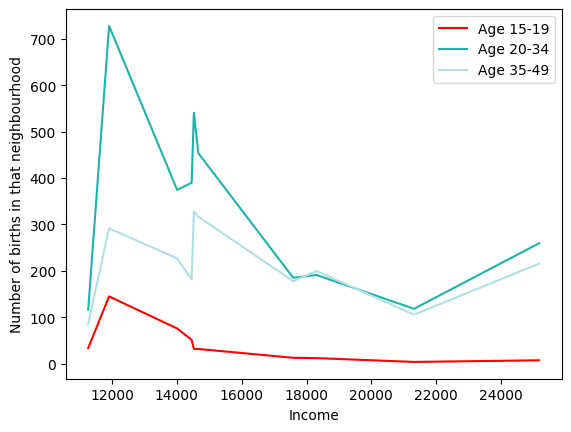

In [44]:
plt.plot(b1519_plot['Import_Euros'],b1519_plot['Nombre'],label='Age 15-19',color='red')
plt.plot(b2034_plot['Import_Euros'],b2034_plot['Nombre'],label='Age 20-34',color='lightseagreen')
plt.plot(b3549_plot['Import_Euros'],b3549_plot['Nombre'],label='Age 35-49',color='powderblue')
plt.xlabel("Income")
plt.ylabel("Number of births in that neighbourhood")
plt.legend(loc="upper right")
plt.show()

/tmp/ipykernel_4587/2588281217.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,1.3e3)


<Figure size 640x480 with 0 Axes>

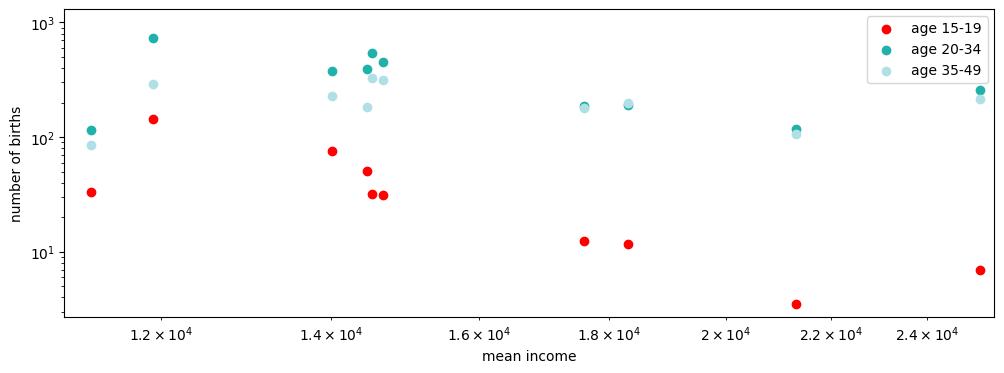

In [70]:
plt.figure(3)
plt.figure(figsize=(12, 4)) 
plt.scatter(b1519_plot['Import_Euros'],b1519_plot['Nombre'],label='age 15-19',color='red')
plt.scatter(b2034_plot['Import_Euros'],b2034_plot['Nombre'],label='age 20-34',color='lightseagreen')
plt.scatter(b3549_plot['Import_Euros'],b3549_plot['Nombre'],label='age 35-49',color='powderblue')
#plt.xticks(b1519['Import_Euros'], b1519['Nom_Districte'])
plt.xlabel("mean income")
plt.xscale('log')
plt.yscale('log')
plt.xlim(11000,25500)
plt.ylim(0,1.3e3)

plt.xticks(rotation=75)
plt.ylabel("number of births")
plt.legend(loc="upper right")
plt.show()